In [1]:
import pandas as pd
import geopandas as gpd
import plotly.express as px
import matplotlib.pyplot as plt

In [65]:
combined_df = pd.read_csv("../data/derived/medals.csv")
summer_df = pd.read_csv("../data/derived/summer_medals.csv")
winter_df = pd.read_csv("../data/derived/winter_medals.csv")

In [66]:
summer_medals = summer_df.groupby('country_3_letter_code')['medal_type'].count()
winter_medals = winter_df.groupby('country_3_letter_code')['medal_type'].count()


In [67]:
world = gpd.read_file('countries.geojson')
world['summer_medals'] = world['ISO_A3'].map(summer_medals)
world['winter_medals'] = world['ISO_A3'].map(winter_medals)

In [ ]:
world['summer_medals'].fillna(0, inplace=True)
world['winter_medals'].fillna(0, inplace=True)
world['color'] = 'red'

world.loc[world['winter_medals'] > world['summer_medals'], 'color'] = 'blue'

In [69]:
print(world[['ISO_A3', 'summer_medals', 'winter_medals']])

    ISO_A3  summer_medals  winter_medals
0      ABW            0.0            0.0
1      AFG            2.0            0.0
2      AGO            0.0            0.0
3      AIA            0.0            0.0
4      ALB            0.0            0.0
..     ...            ...            ...
250    WSM            1.0            0.0
251    YEM            0.0            0.0
252    ZAF           89.0            0.0
253    ZMB            2.0            0.0
254    ZWE            8.0            0.0

[255 rows x 3 columns]


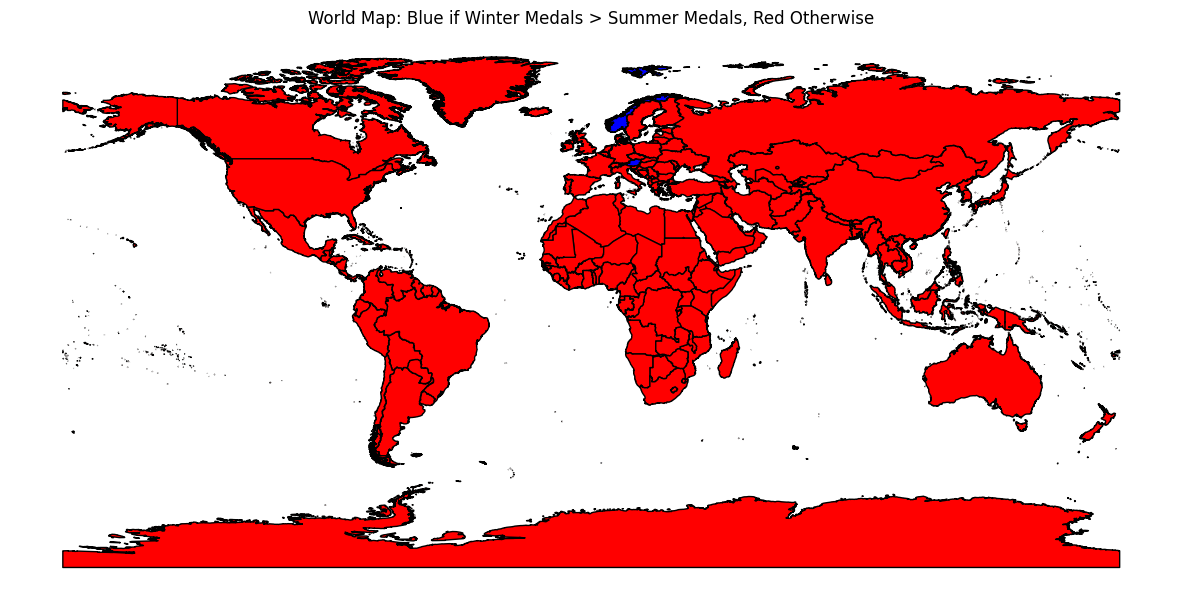

In [70]:
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
world.plot(ax=ax, color=world['color'], edgecolor='black')
ax.axis('off')
plt.title('World Map: Blue if Winter Medals > Summer Medals, Red Otherwise')
plt.show()


# CHECK

In [71]:
world_countries = set(world['ISO_A3'])
combined_medals_countries = set(combined_medals.keys())
countries_not_in_world = combined_medals_countries - world_countries
print("Countries in combined_medals but not included in the world GeoDataFrame:")
for country in countries_not_in_world:
    print(country)

print(len(countries_not_in_world))

Countries in combined_medals but not included in the world GeoDataFrame:
WIF
IOA
EUN
ANZ
MIX
5
